## Computation ACME-DataVisual
### 9. Data Visualization 

* #### July 3, 2019
* #### Sherry Peng Tian 

### Problem 2
Bernstein basis polynomials 


$b_(v,n)(x) = \binom{n}{v}x^v(1-x)^{n-v}$

In [1]:
import scipy.special
import numpy as np 
from matplotlib import pyplot as plt

fig = plt.figure(figsize = [16, 16])

x = np.linspace(0,1, 100)
#T = np.polynomial.Chebyshev.basis
constant = scipy.special.binom
for n in range(0, 4): 
    ind = 4*n + 1
    for v in range(0, n+1): 
        sub = fig.add_subplot(4, 4, ind+v)
        polynomial = constant(n,v) *x**v * (1-x) ** (n-v)
        sub.plot(x, polynomial, label = "n = {}, v = {}".format(n, v), )
        
        plt.title("n = {}, v = {}".format(n, v))
        plt.xlim([0, 1.0])
        plt.ylim([0, 1.5])
        plt.legend(loc = "upper left")
        plt.tight_layout()

### Problem 3

In [2]:
data = np.load("MLB.npy")
data.shape 

(1033, 3)

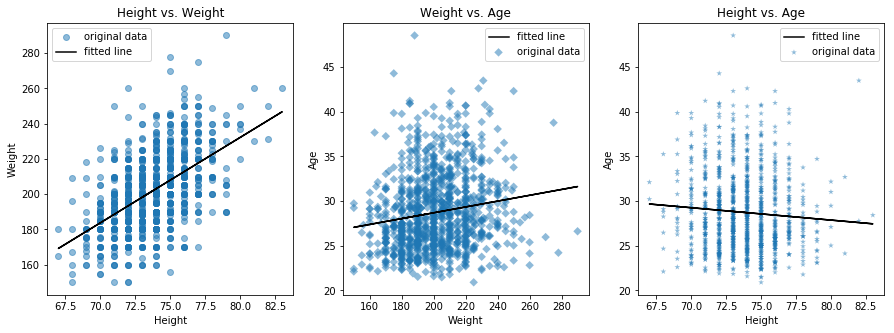

In [3]:
from scipy.stats import linregress

fig = plt.figure(figsize = [15, 5])
x = data[:,0]
y = data[:,1]
z = data[:,2]

plt.subplot(131)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, y, 'o', alpha=.5, label="original data")
plt.plot(x, intercept + slope*x, 'k', label="fitted line")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs. Weight")
plt.legend()

plt.subplot(132)
plt.scatter(y, z, marker='D', alpha=.5, edgecolor="none", label="original data")
slope, intercept, r_value, p_value, std_err = linregress(y, z)
plt.plot(y, intercept + slope*y, 'k', label="fitted line")
plt.xlabel("Weight")
plt.ylabel("Age")
plt.title("Weight vs. Age")
plt.legend()

plt.subplot(133)
plt.scatter(x, z, marker='*', alpha=.5, edgecolor="none", label="original data")
slope, intercept, r_value, p_value, std_err = linregress(x, z)
plt.plot(x, intercept + slope*x, 'k', label="fitted line")
plt.xlabel("Height")
plt.ylabel("Age")
plt.title("Height vs. Age")
plt.legend()
plt.show()

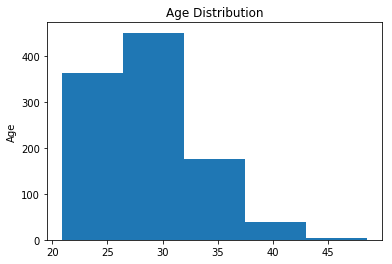

In [4]:
plt.hist(z, bins=5)
plt.ylabel("Age")
plt.title("Age Distribution")
plt.show()

### Heatmap & Contour plots 

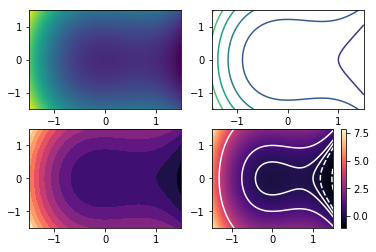

In [5]:
x = np.linspace(-1.5, 1.5, 200)
X, Y = np.meshgrid(x, x)
Z = Y**2 - X**3 + X**2

fig, ax = plt.subplots(2,2)
ax[0, 0].pcolormesh(X, Y, Z, cmap = "viridis")
ax[0, 1].contour(X, Y, Z, 6, cmap = "viridis")
ax[1, 0].contourf(X, Y, Z, 12, cmap = "magma")

ax[1, 1].contour(X, Y, Z, [-1, -.25, 0, .25, 1, 4], colors = "white")
cax = ax[1,1].pcolormesh(X, Y, Z, cmap = "magma")
fig.colorbar(cax, ax=ax[1,1])

plt.show()

### Problem 5

<Figure size 576x288 with 0 Axes>

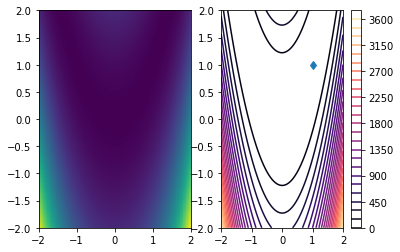

In [6]:
x = np.linspace(-2,2, 200)
y = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x, x)
Z = (1-X)**2 + 100*(Y-X**2)**2

plt.figure(figsize = [8, 4])
fig, ax = plt.subplots(1,2)
ax[0].pcolormesh(X, Y, Z, cmap = "viridis")

cax = ax[1].contour(X, Y, Z, 30, cmap = "magma")
plt.plot(1, 1, marker = 'd', label = "min")
fig.colorbar(cax, ax=ax[1])

### Problem 6

In [13]:
df = np.load("countries.npy")
print(df.shape)

countries = np.array(["Austria", "Bolivia", "Brazil", "China",
"Finland", "Germany", "Hungary", "India",
"Japan", "North Korea", "Montenegro", "Norway",
"Peru", "South Korea", "Sri Lanka", "Switzerland",
"Turkey", "United Kingdom", "United States", "Vietnam"])
pop = df[:, 0]
pop_index = np.argsort(pop)
GDP = df[:, 1]
GDP_index = np.argsort(GDP)    # Sort GDP by largest 
male_height = df[:, 2]
female_height = df[:, 3]

(20, 4)


In [12]:
def default_plt(): 
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)

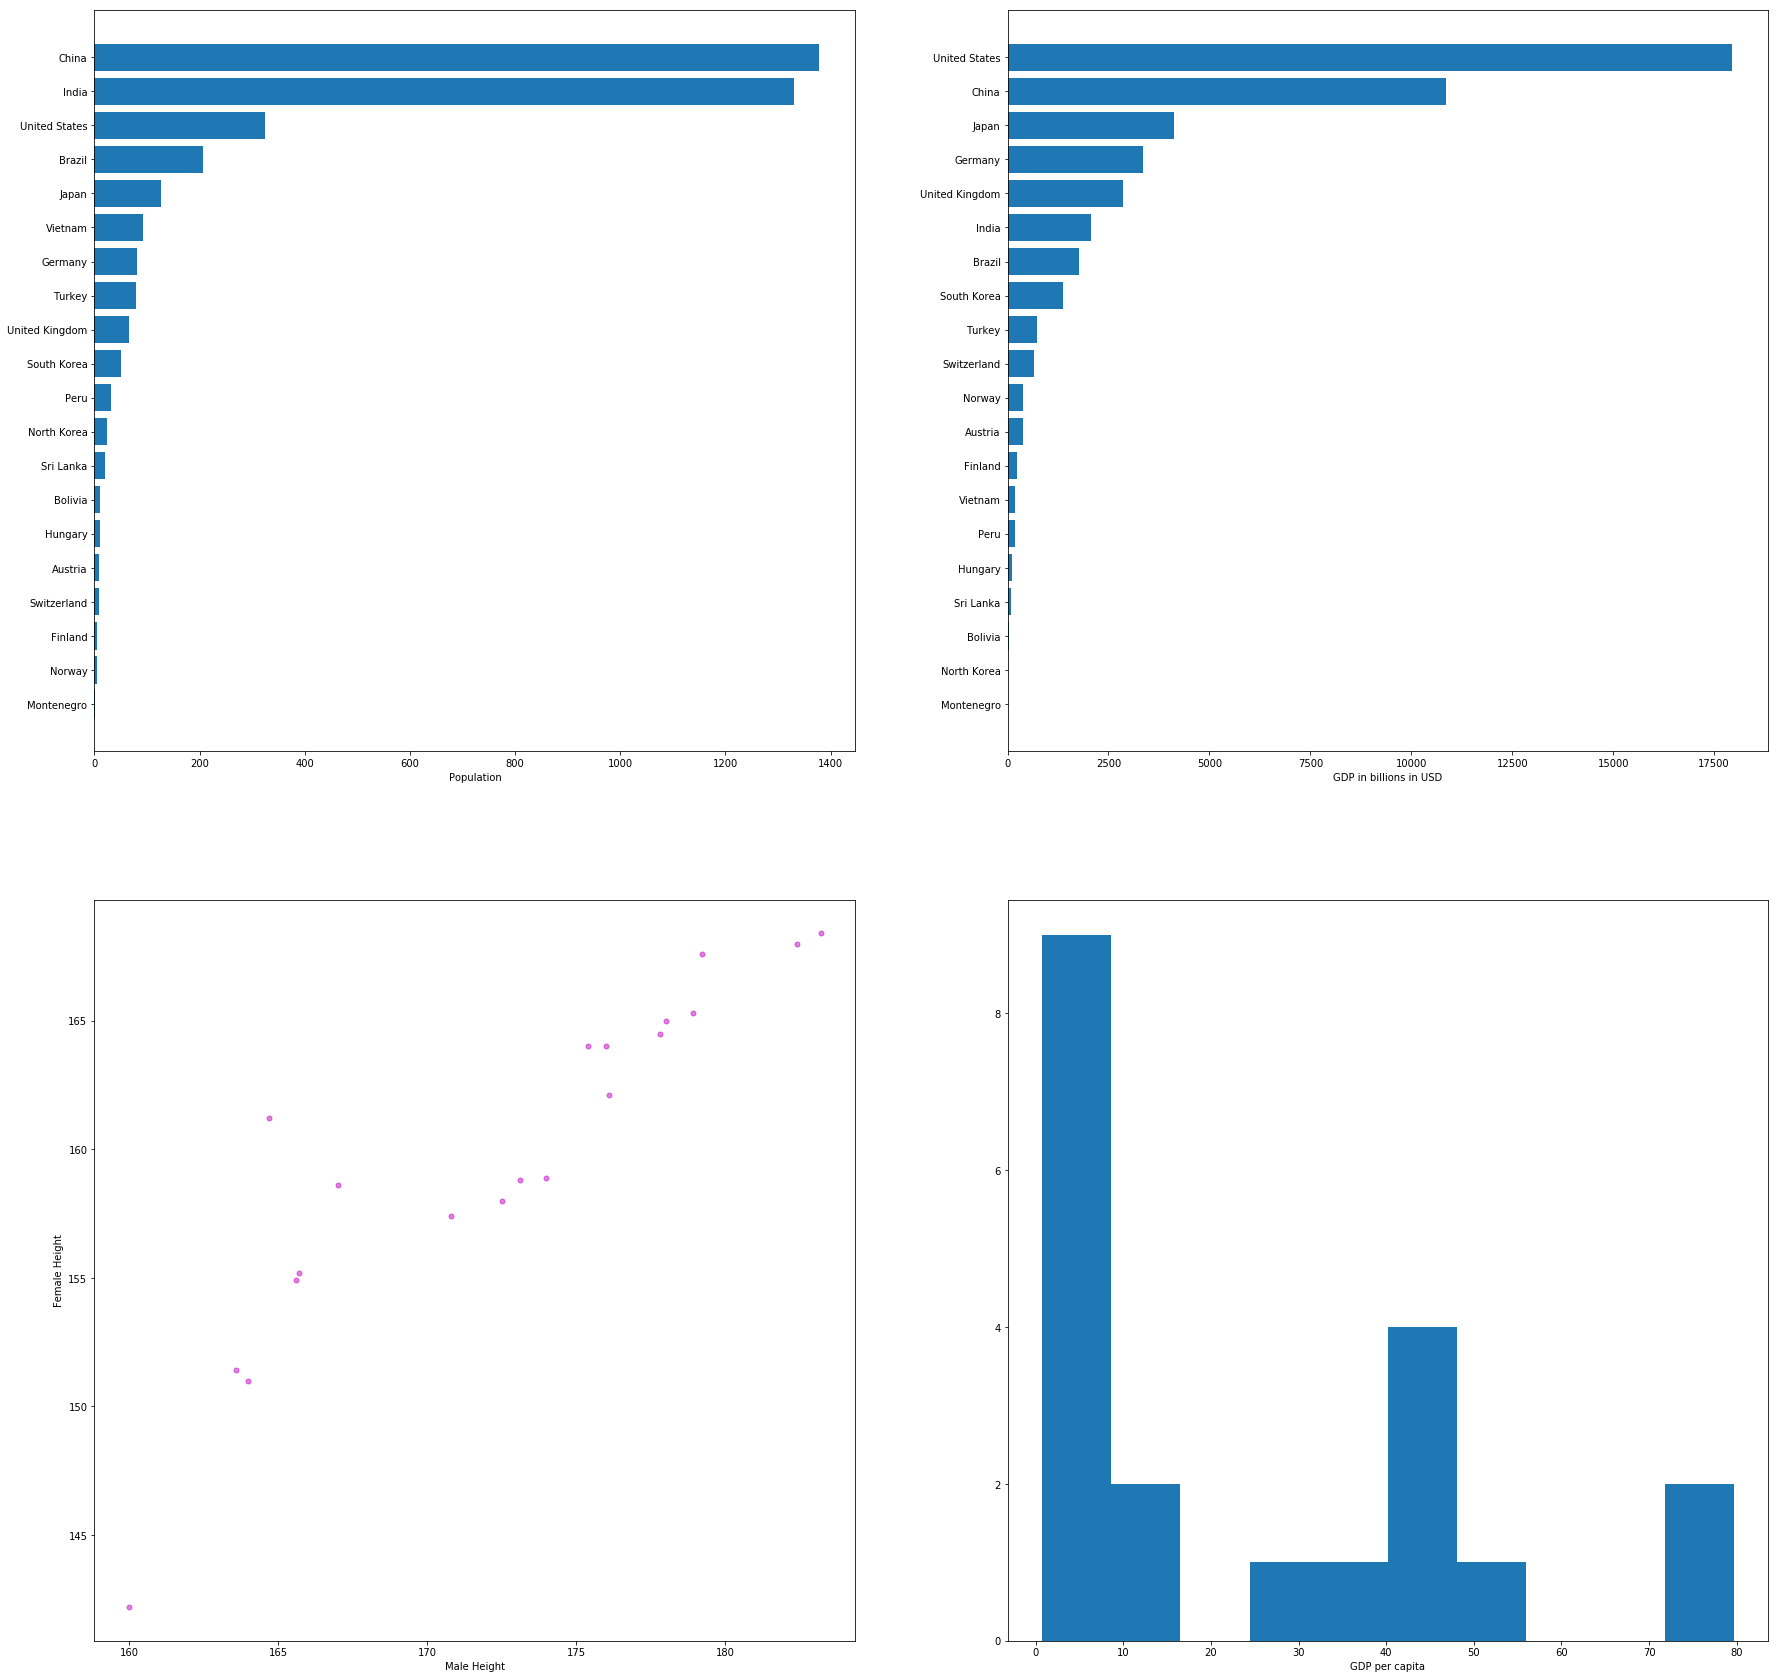

In [18]:
plt.figure(figsize = [30,30])
plt.title("20 Countries") 

position = np.arange(20)
plt.subplot(221)
plt.barh(position, pop[pop_index], align = "center")
plt.yticks(position, countries[pop_index])
plt.xlabel("Population")

plt.subplot(222)
plt.barh(position, GDP[GDP_index], align = "center")
plt.yticks(position, countries[GDP_index])
plt.xlabel("GDP in billions in USD")

plt.subplot(223)
plt.plot(male_height, female_height, "mo", markersize=5, alpha=.5)
plt.xlabel("Male Height")
plt.ylabel("Female Height")

plt.subplot(224)
GDP_percapita = np.empty_like(GDP)
GDP_percapita = GDP / pop
plt.hist(GDP_percapita)
plt.xlabel("GDP per capita")

plt.show()

#### Conclusion: 
1. Population: China and India but GDP: U.S. and China 
2. Male and female height are positively correlated. 
3. Nearly half of the 20 countries have very low GDP per capita after calculation. 